In [1]:
import numpy as np
import matplotlib.pyplot as plt

1번 문제 - Metropolis 이용

L^3 인 정육면체 격자로 바꿔주 \
E = -J \sum_{<ij>} s_i s_j 일떄 j =1이다 이떄의 Metro polis를 사용해서 함수를 그려야하는데
m = \abs(N^{-1} \sum_k s_k)  를 온도의 역수인 \beta 함수로 그려줘, 오차막대도 그리고

근데 거기에서 임계점이 \beta_c = 0.22 정도로 알려져 있으니까 그 주변을 잘 살펴줘


\beta = \beta_c에서 가로축을 L, 세로축을 m으로 하는 그래프를 그리고, matplot.lib.pyplot.loglog를 사용해서 양쪾 축을 모두 로그스케일로 그려줘

In [2]:
# 3차원에서 기본이 되는 함수
def neighbor(L, index) : #인덱스를 3차원좌표 (i,j,k)로 받아야함
    i = index // (L * L) #i를 x축처럼 생각
    j = (index % (L * L)) // L #j를 y축처럼 생각
    k = index % L #k를 z축처럼 생각
    neighbors = [
        ((i-1) % L, j, k), ((i+1) % L, j, k), #i의 이웃
        (i, (j-1) % L, k), (i, (j+1) % L, k), #j의 이웃
        (i, j, (k-1) % L), (i, j, (k+1) % L) #k의 이웃
    ]
    return neighbors

def energy(L, S):
    E = 0
    for i in range(L):
        for j in range(L):
            for k in range(L):
                spin = S[i, j, k] #[i,j,k]의 스핀값을
                for ni, nj, nk in neighbor(L, i * L * L + j * L + k):
                    E -= spin * S[ni, nj, nk] #스핀곱을해서 에너지를 더함
    return E / 2  # 각 쌍이 두 번 세어졌으므로 나누기 2를 합니다.

1-a 문제

M_list: [0.11793600000000003, 0.21448000000000006, 0.13414400000000004, 0.23251200000000002, 0.07350400000000001, 0.12083200000000002, 0.20080000000000003, 0.19819200000000006, 0.17646400000000007, 0.17616000000000004, 0.11164800000000001, 0.27851200000000004, 0.17832000000000003, 0.22785600000000006, 0.31265600000000004, 0.5344479999999998, 0.33052800000000004, 0.5759839999999999, 0.8619359999999999, 0.836912, 0.7946719999999999, 0.9652479999999999, 0.9874400000000001, 0.996448, 0.9988319999999999, 1.0, 1.0, 1.0, 1.0, 1.0]
M_error_list: [0.002063091831208684, 0.0037021930797839276, 0.0029652512986254645, 0.003877515938845384, 0.001719323699598188, 0.0019776217474532383, 0.00302655976316345, 0.0033539843672861685, 0.004058047893260995, 0.002620382872787868, 0.0030581151214432722, 0.0038765708888139788, 0.0041835938617413625, 0.003849319324763795, 0.0027483379821266526, 0.00314966780724571, 0.004231721306513462, 0.004039675202785492, 0.0017260254644703248, 0.001415050619589278, 0.001776

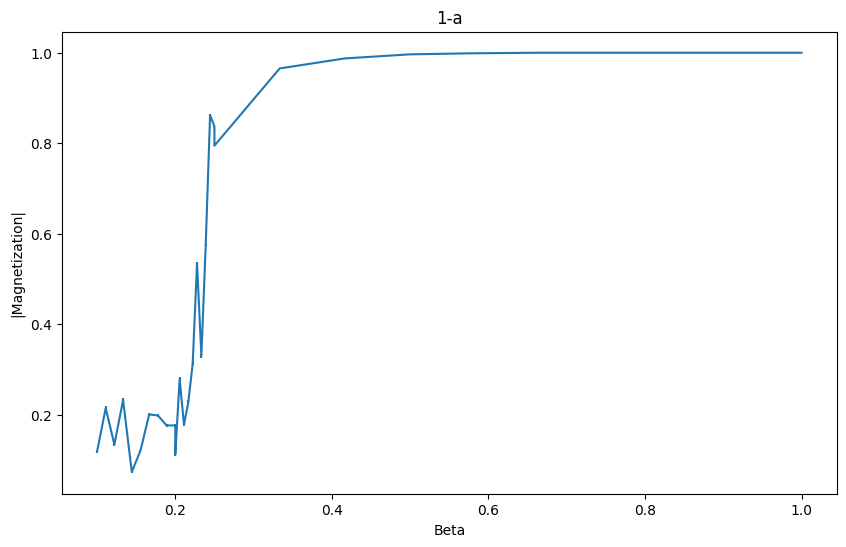

In [12]:
L = 5
n = 1000
temp_beta_1 = np.linspace(0.1, 0.20, 10)
temp_beta_2 = np.linspace(0.20, 0.25, 10) # beta_c = 0.22이기에 0.2~0.25는 촘촘하게 살핌
temp_beta_3 = np.linspace(0.25, 1.0, 10)
beta = np.concatenate([temp_beta_1, temp_beta_2, temp_beta_3])
S = np.random.randint(0,2,(L,L,L)) * 2 - 1
M_list = []
M_error_list = []

for temp_beta in beta:
    avg_energy = 0
    avg_magnetization = 0
    magnetizations = []
    for _ in range(n):
        U = S.copy()
        random_index = np.random.randint(0, L*L*L)
        random_i = random_index // (L * L)
        random_j = (random_index % (L * L)) // L
        random_k = random_index % L
        U[random_i, random_j, random_k] *= -1  # 스핀을 뒤집음

        temp_sum = 0
        for temp_i, temp_j, temp_k in neighbor(L, random_index):
            temp_sum += S[temp_i][temp_j][temp_k]
        delta_E = 2 * S[random_i][random_j][random_k] * temp_sum

        if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
            S = U

        current_energy = energy(L, S)
        current_magnetization = np.abs(np.mean(S))
        magnetizations.append(current_magnetization)

    avg_magnetization = np.mean(magnetizations)
    magnetization_error = np.std(magnetizations) / np.sqrt(n)

    M_list.append(avg_magnetization)
    M_error_list.append(magnetization_error)

print('M_list:', M_list)
print('M_error_list:', M_error_list)

plt.figure(figsize=(10, 6))
plt.title("1-a")
plt.errorbar(beta, M_list, M_error_list)
plt.xlabel('Beta')
plt.ylabel('|Magnetization|')
plt.show()

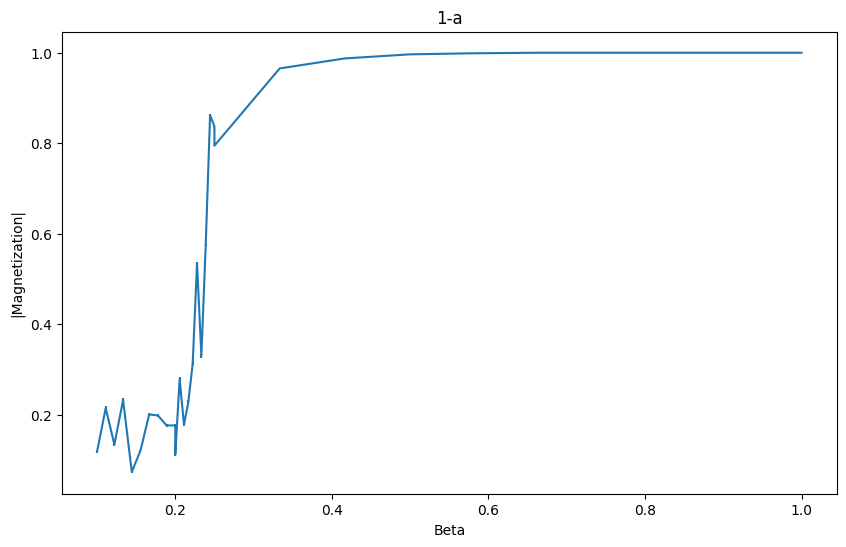

In [15]:
plt.figure(figsize=(10, 6))
plt.title("1-a")
plt.errorbar(beta, M_list, M_error_list)
plt.xlabel('Beta')
plt.ylabel('|Magnetization|')
plt.show()

1-b 문제

In [4]:
L_list = [5, 10, 15, 20]
n = 1000
M_list_byL = []
M_error_list_byL = []
beta = 0.22 #beta = beta_c = 0.22
for L in L_list:
    S = np.random.randint(0,2,(L,L,L)) * 2 - 1
    avg_magnetization = 0
    magnetizations = []
    for _ in range(n):
        U = S.copy()
        random_index = np.random.randint(0, L*L*L)
        random_i = random_index // (L * L)
        random_j = (random_index % (L * L)) // L
        random_k = random_index % L
        U[random_i, random_j, random_k] *= -1  # 스핀을 뒤집음

        temp_sum = 0
        for temp_i, temp_j, temp_k in neighbor(L, random_index):
            temp_sum += S[temp_i][temp_j][temp_k]
        delta_E = 2 * S[random_i][random_j][random_k] * temp_sum

        if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
            S = U

        current_energy = energy(L, S)
        current_magnetization = np.abs(np.mean(S))
        magnetizations.append(current_magnetization)

    avg_magnetization = np.mean(magnetizations)
    magnetization_error = np.std(magnetizations) / np.sqrt(n)

    M_list_byL.append(avg_magnetization)
    M_error_list_byL.append(magnetization_error)

print('M_list_byL:', M_list_byL)
print('M_error_list_byL:', M_error_list_byL)

M_list_byL: [0.76008, 0.036272000000000006, 0.011994074074074072, 0.008915500000000002]
M_error_list_byL: [0.008079492657339319, 0.0006724804948844242, 0.00026149144456939777, 4.43788772953981e-05]


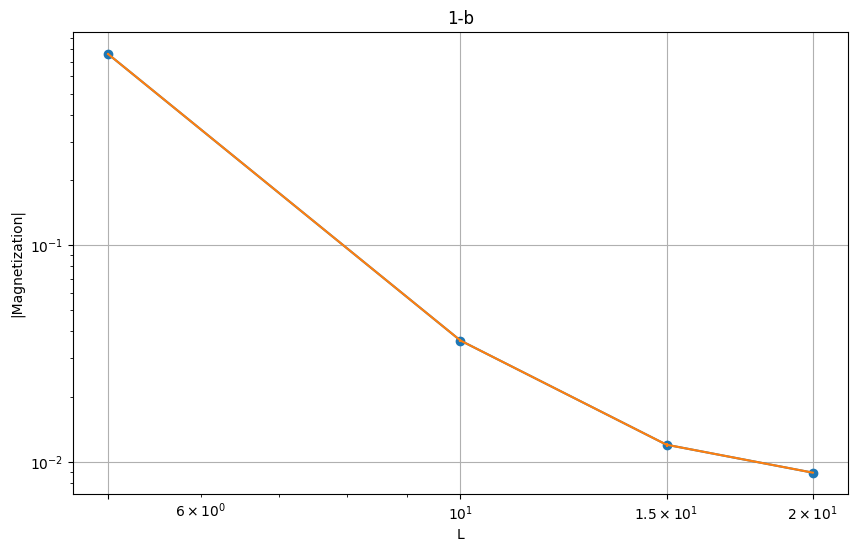

In [5]:
plt.figure(figsize=(10, 6))
plt.title("1-b")
plt.loglog(L_list, M_list_byL, 'o-')
plt.errorbar(L_list, M_list_byL, M_error_list_byL)
plt.xlabel('L')
plt.xticks(L_list)
plt.grid()
plt.ylabel('|Magnetization|')
plt.show()

2번\

저걸 담금질기법을 사용해서 문제를 푸는데 도시의 수를 10^3으로 하고, 방문하는 도시의 순서를 바꿀때는 1/2의 확률로 반전, 혹은 전치를 시도한다고함

여기서 반전, 전치가 무엇일까?

In [6]:
# 두 점 R1, R2 사이의 유클리드 거리 계산 함수
def Distance(R1, R2):
    return np.linalg.norm(R1 - R2)

# 도시 리스트를 도는 총 거리 계산 함수
def TotalDistance(city, R):
    dist = 0
    for i in range(len(city) - 1):
        dist += Distance(R[city[i]], R[city[i + 1]])
    dist += Distance(R[city[-1]], R[city[0]])  # 마지막 도시에서 첫 도시로 돌아오는 거리 추가
    return dist

# 경로 시각화 함수
def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]  # 경로의 마지막 도시에서 첫 도시로 돌아오는 경로 추가
    Pt = np.array(Pt)
    plt.figure()
    plt.title('Total distance = ' + str(dist))
    plt.plot(Pt[:, 0], Pt[:, 1], 'o-')
    plt.show()



In [7]:
# 도시 리스트에서 두 도시의 위치를 반전하는 함수
def Inversion(city, ncity):
    i, j = sorted(np.random.choice(ncity, 2, replace=False))
    new_city = city[:i] + city[i:j+1][::-1] + city[j+1:]
    return new_city

# 도시 리스트에서 두 도시의 위치를 전치하는 함수
def Transposition(city, ncity):
    n_0, n_1, n_4, n_5 = np.random.choice(ncity, 4, replace=False) #중복없이 4개 선택

    # 도시의 순서를 정함
    if n_0 > n_1:
        n_0, n_1 = n_1, n_0
    if n_4 > n_5:
        n_4, n_5 = n_5, n_4

    zerotoone = city[n_0:n_1+1] #n_0~n_1 도시 추출
    beforeone = city[:n_0] #n_0 이전 도시 추출
    onetofour= city[n_1+1:n_4] # n_4 이전 도시 추출
    afterfive = city[n_5:] # n_5 이후 도시 추출

    new_city = beforeone + onetofour + zerotoone + afterfive # n_0 이전의 도시 + n_1~n_4 사이의 도시 + n_0에서 n_1 사이의 도시 + n_5 이후의 도시

    return new_city

In [8]:
# 담금질 기법
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city,R)
    for t in range(maxTsteps):
        accepted = 0 #simulation analying에 필요한 기법
        for i in range(maxSteps):
            if np.random.rand() < 0.5 :
                new_city = Inversion(city, len(city))
            else :
                new_city = Transposition(city, len(city))

            new_dist = TotalDistance(new_city, R)
            de = new_dist - dist

            if de < 0 or 0.5 > np.random.rand():
                accepted += 1
                dist += de
                city = Inversion(city, ncity)
            elif de < 0 or 0.5 < np.random.rand():
                accepted += 1
                dist += de
                city = Transposition(city, ncity)
            if accepted > maxAccepted:
                break
        T *= fCool #온도를 낮춘다.
        Plot(city, R, dist)
        print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist, accepted))
        if accepted == 0:
            break
    return city

In [ ]:
ncity = 10**3

maxSteps = 100*ncity
maxAccepted = 10*ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

np.random.seed(0)

R = np.random.random((ncity,2))
city = list(range(ncity))

ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)